In [6]:
# Import all of the necessary libraries to start 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import binarize
from sklearn.model_selection import GridSearchCV
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [3]:
df = pd.read_csv("energy_classification_features_final.csv")
df.head()

,AMTMICROM,CDD30YR,CDD65,CLIMATE_REGION_PUB,CUFEETNG,DIVISION,DOLLARELM,DOOR1SUM,EDUCATION,KWH_M,NUMADULT,REBATEAPP,SEPDVR,SOLOTHER,TAXCREDITAPP,TOTSQFT_EN,TOTUCSQFT,TVAUDIOSYS,TVONWD1,TVONWE1,USECENAC,TOTDOLENM,INCOMEM,EN_BURDEN,ENERGY_SQFT,Y
0,0.101010,0.229972,0.267595,0.00,0.094787,1.000000,0.117037,0.250,0.25,0.082462,0.111111,0,0.0,0,0,0.191667,0.050088,0.000000,0.4,0.6,0.6,0.133333,1.000000,0.017126,0.092348,0
1,0.202020,0.430594,0.423036,0.25,0.000000,0.666667,0.165926,0.000,0.25,0.191716,0.111111,0,0.0,0,0,0.064976,0.000000,0.000000,1.0,1.0,0.0,0.129762,0.153867,0.087008,0.222115,0
2,0.141414,0.355490,0.338278,0.50,0.092891,0.555556,0.296296,0.125,0.00,0.310279,0.222222,0,0.0,0,0,0.249638,0.071625,0.000000,0.8,0.8,0.2,0.275000,0.153867,0.183071,0.150586,1
3,0.000000,0.229109,0.207961,0.50,0.000000,0.333333,0.158519,0.500,0.75,0.155045,0.000000,0,0.0,0,0,0.284058,0.050088,0.000000,0.4,0.2,0.4,0.202381,0.307735,0.080315,0.097378,0
4,0.060606,0.150380,0.150295,0.75,0.079621,0.111111,0.068148,0.125,0.25,0.048451,0.111111,0,0.0,0,0,0.096981,0.042700,0.222222,0.4,0.4,0.4,0.084524,0.307735,0.033268,0.106547,0


In [4]:
df.shape

(5686, 26)

In [12]:
X = df.values[:, 0:25]
Y = df.values[:, 25]

In [13]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [14]:
clf = GridSearchCV

In [18]:
# Fit training dataset to logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve

lr = LogisticRegression()
clf = GridSearchCV(lr, hyperparameters, cv = 5, verbose = 1)

best_model = clf.fit(X, Y)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


Best Penalty: l1
Best C: 7.742636826811269


In [21]:
# Calculate Accuracy

lr_model = LogisticRegression(C = 7.7426, penalty = 'l1')
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = cross_val_score(lr_model, X, Y, cv=shuffle, scoring = 'accuracy')

print ("The accuracy score are %s" 
       % (accuracy))

print ("The mean of the accuracy scores is %s"
      % (accuracy.mean()))

The accuracy score are [0.99824253 0.99824253 1.         0.99121265 0.99824253 0.99297012
 1.         0.99647887 0.99823944 0.99647887]
The mean of the accuracy scores is 0.9970107552167132


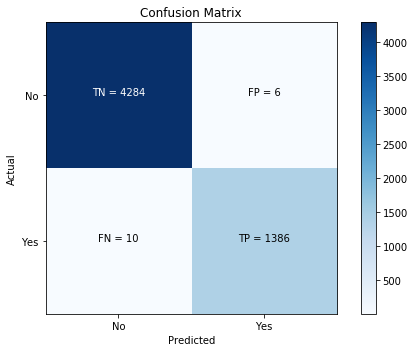

In [32]:
# Import Confusion Matrix Libraries 
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(lr_model, X,Y, cv=10)
cm = confusion_matrix(Y,y_pred)
plt.clf()
plt.figure(figsize = (7, 5))
plt.imshow(cm, interpolation='nearest', cmap = 'Blues')
plt.colorbar()
classNames = ['No','Yes']
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 1.5 if s else cm.max() / 2
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+format(cm[i][j]), 
                 horizontalalignment ="center", 
                 color ="white" if cm[i][j] > thresh else "black")       
plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 

print ('Accuracy: {:.4f}'.format(accuracy_score(Y, y_pred)))
print ('Recall Score: {:.4f}'.format(recall_score(Y, y_pred)))
print ('Precision Score: {:.4f}'.format(precision_score(Y, y_pred)))
print ('F1 Score: {:.4f}'.format(f1_score(Y, y_pred)))

Accuracy: 0.9972
Recall Score: 0.9928
Precision Score: 0.9957
F1 Score: 0.9943


Using matplotlib backend: MacOSX


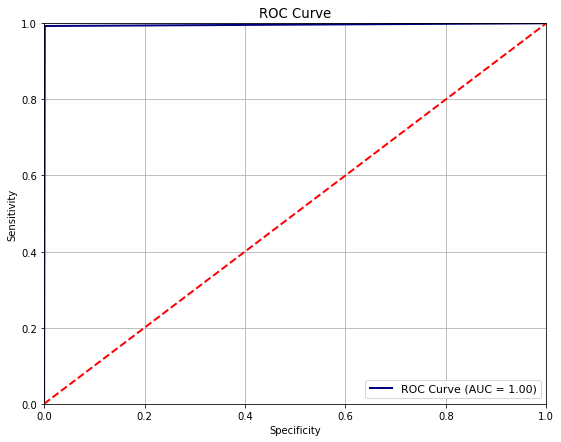

In [31]:
# ROC Curve 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib

fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)

plt.clf()
plt.figure(figsize = (9, 7))
plt.plot(fpr, tpr, color='navy',
         lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 2], [0, 2], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 11
plt.title('ROC Curve')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()